In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
#데이터 주소
DATA_PATH = "./data.csv"

#데이터를 DataFrame의 형태로 불러옵니다.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

In [4]:
#데이터 불러오기
df = load_csv(DATA_PATH)
df.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# 모든 값이 NaN인 열 삭제(마지막 공백을 제거)
df = df.dropna(axis=1, how="all")
df = df.dropna(subset=['diagnosis'])
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [6]:
# ID, diagnosis 제외한 수치형 데이터 선택
features = df.drop(columns=["id", "diagnosis"])

#이상치를 찾아내기 위해서 사용한 describe(현재 문제되는 이상치는 없어서 이상치 제거/대체는 하지않음음)
print(features.describe())
#현재 결측치를 거르고 남은 행열의 개수 확인
print(features.shape)

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

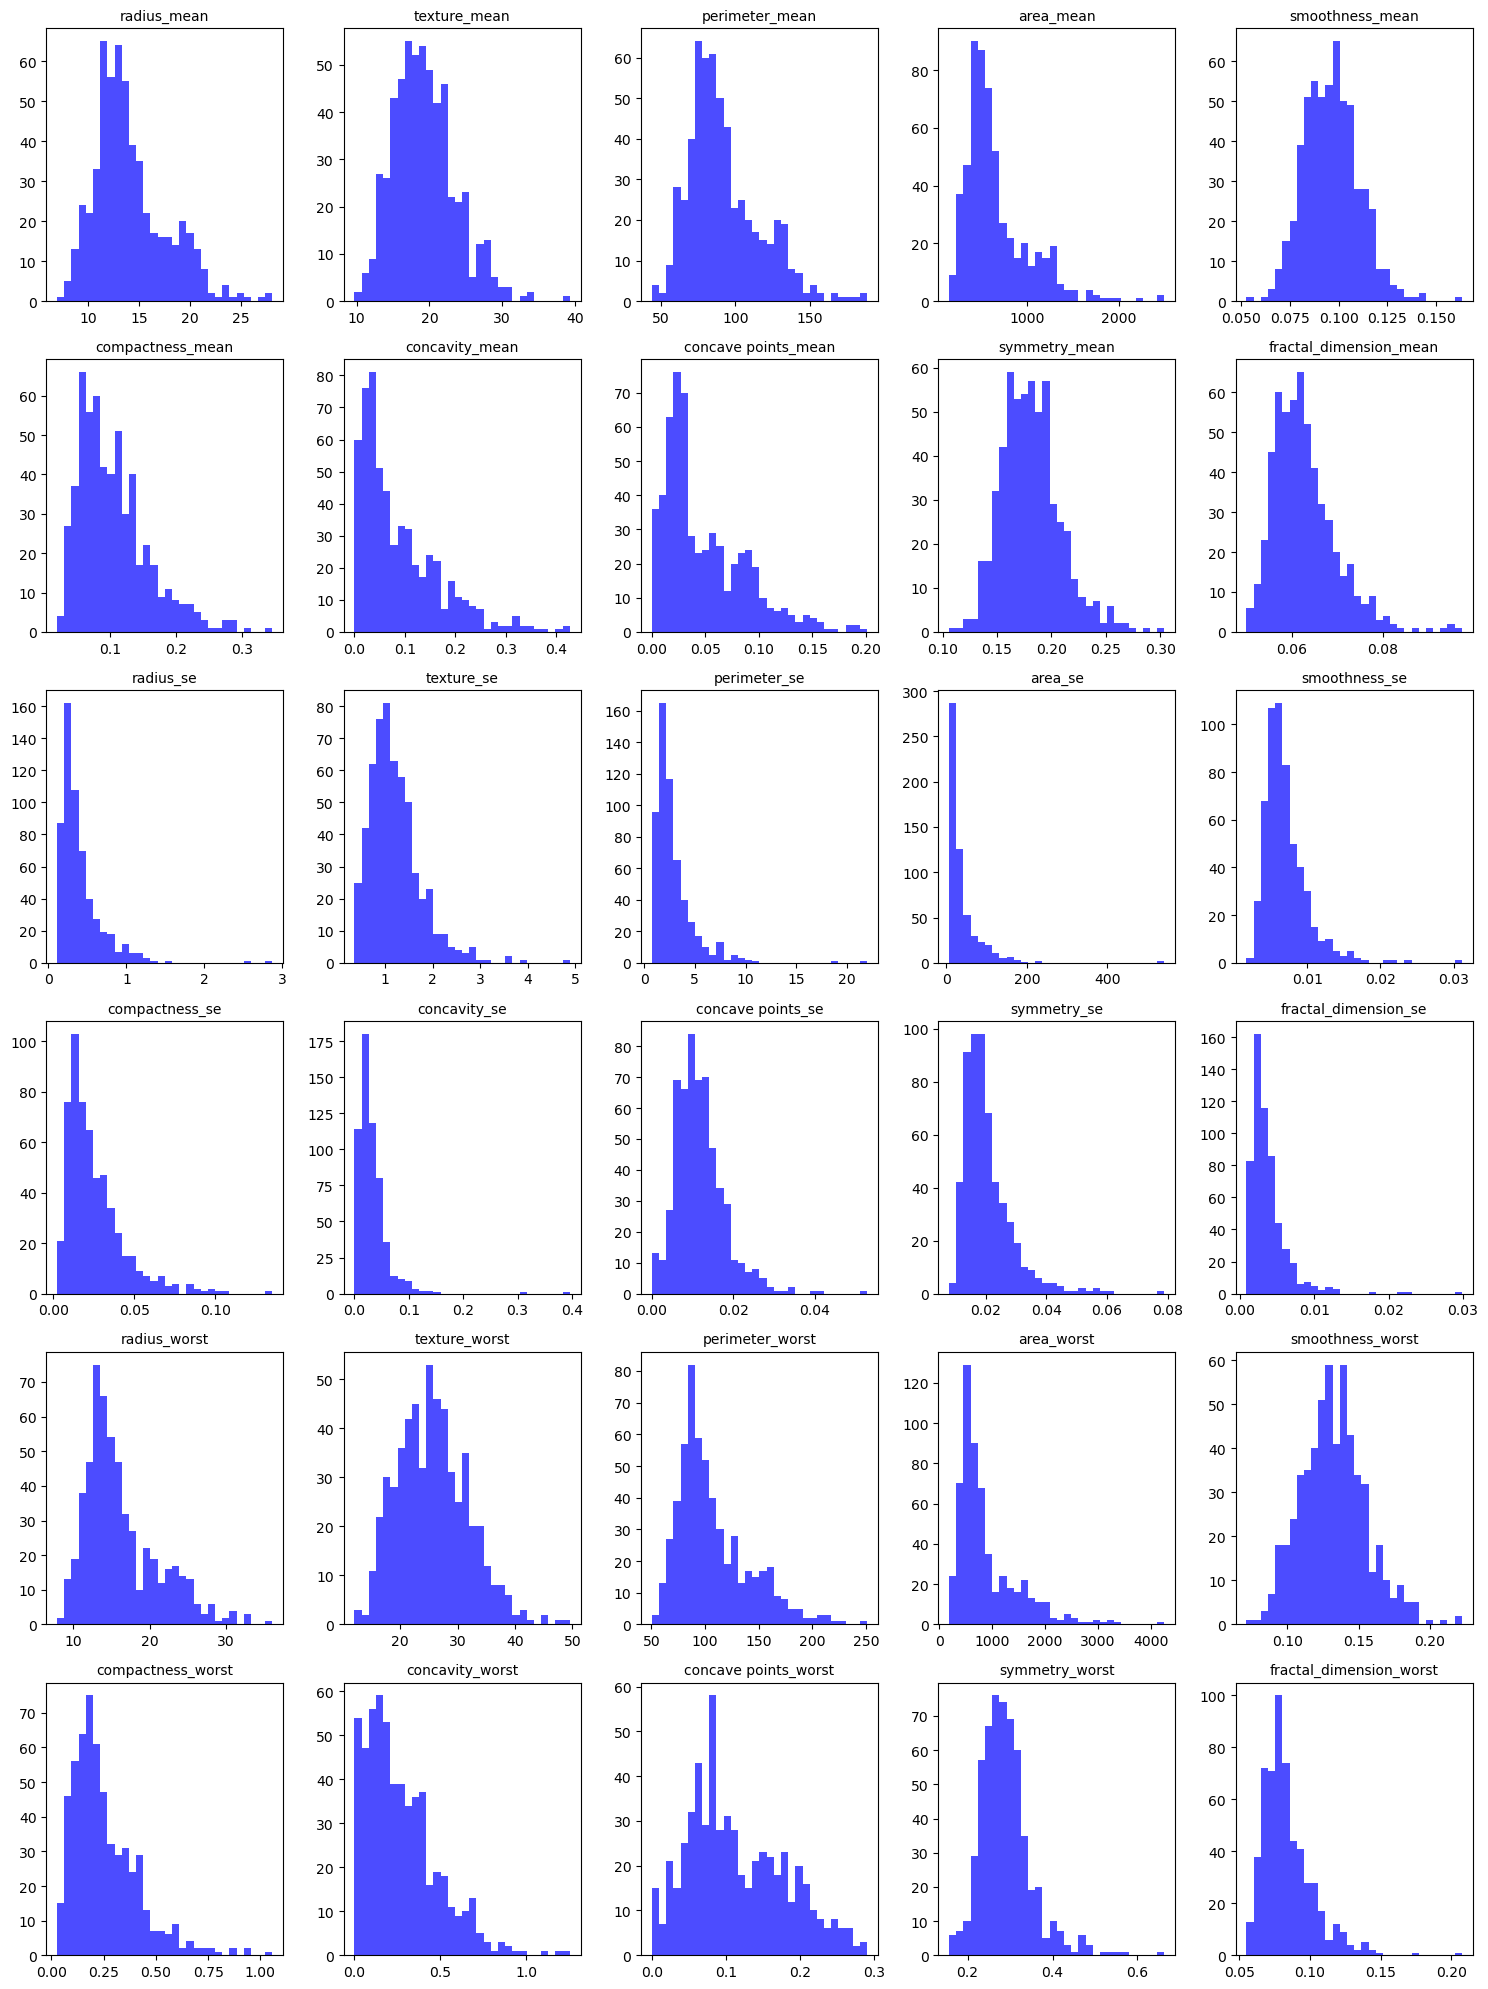

In [7]:
#히스토그램 출력
plt.figure(figsize=(15, 20))  # 그래프 크기 설정
for i, col in enumerate(features, 1):
    plt.subplot(6, 5, i)  # 6행 5열 서브플롯 생성 (30개 컬럼을 맞추기 위해)
    plt.hist(df[col], bins=30, color="blue", alpha=0.7)  # 히스토그램 생성
    plt.title(col, fontsize=10)  # 각 서브플롯 제목(컬럼명)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [8]:
#데이터 스케일링(표준화)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

print(df_scaled.head(10))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   
5    -0.476375     -0.835335       -0.387148  -0.505650         2.237421   
6     1.170908      0.160649        1.138125   1.095295        -0.123136   
7    -0.118517      0.358450       -0.072867  -0.218965         1.604049   
8    -0.320167      0.588830       -0.184080  -0.384207         2.201839   
9    -0.473535      1.105439       -0.329482  -0.509063         1.582699   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.

In [9]:
#타겟 변수 변환(diagnosis가 악성과 양성을 나타내는 결과 값이므로 y피쳐로 역할 수행 0 또는 1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

#악성과 양성에 대한 진단 결과를 가지고 있는 diagnosis에 결측치가 남아있는지 확인인
print(df['diagnosis'].isnull().sum())

#데이터 분할 (Train/Test)
X = df_scaled
y = df['diagnosis']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

#8대2로 분할되었는지 확인인
print(len(train_X),len(test_X))

0
455 114


In [10]:
#로지스틱 회귀 모델 학습
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_y)

#회귀 계수 출력
coefficients = pd.DataFrame(logistic_model.coef_.flatten(), index=X.columns, columns=["Coefficient"])
print(coefficients)
#coefficients의 개수 확인
print(coefficients.shape)

                         Coefficient
radius_mean                 0.366618
texture_mean                0.447544
perimeter_mean              0.353946
area_mean                   0.418602
smoothness_mean             0.209704
compactness_mean           -0.442349
concavity_mean              0.775895
concave points_mean         0.889376
symmetry_mean              -0.044466
fractal_dimension_mean     -0.404255
radius_se                   1.221903
texture_se                  0.081488
perimeter_se                0.761341
area_se                     0.921529
smoothness_se               0.264256
compactness_se             -0.773008
concavity_se               -0.119802
concave points_se           0.460118
symmetry_se                -0.154585
fractal_dimension_se       -0.744404
radius_worst                0.906540
texture_worst               1.059346
perimeter_worst             0.855003
area_worst                  0.845546
smoothness_worst            0.806347
compactness_worst          -0.001953
c

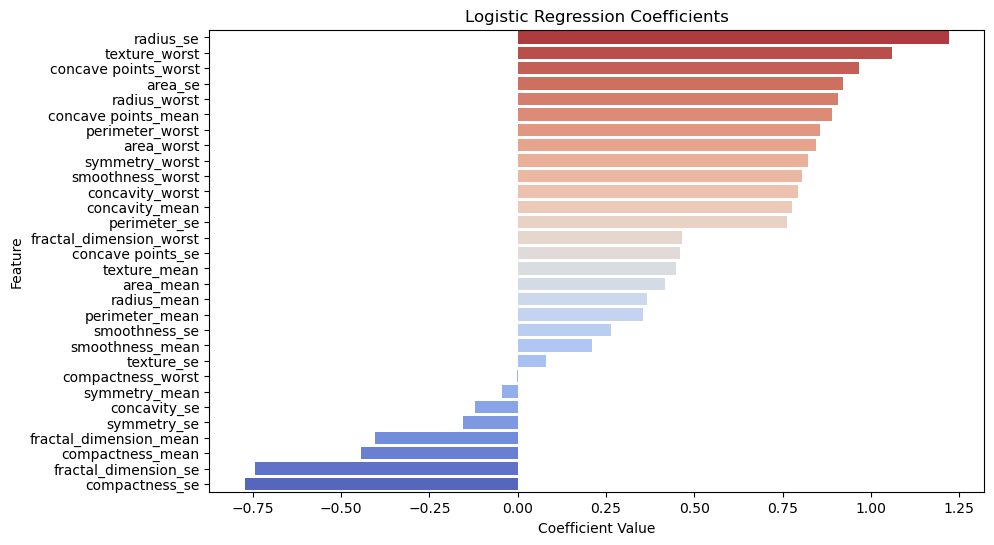

In [11]:
# 계수 값 내림차순 정렬
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients["Coefficient"], y=coefficients.index, palette="coolwarm_r")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

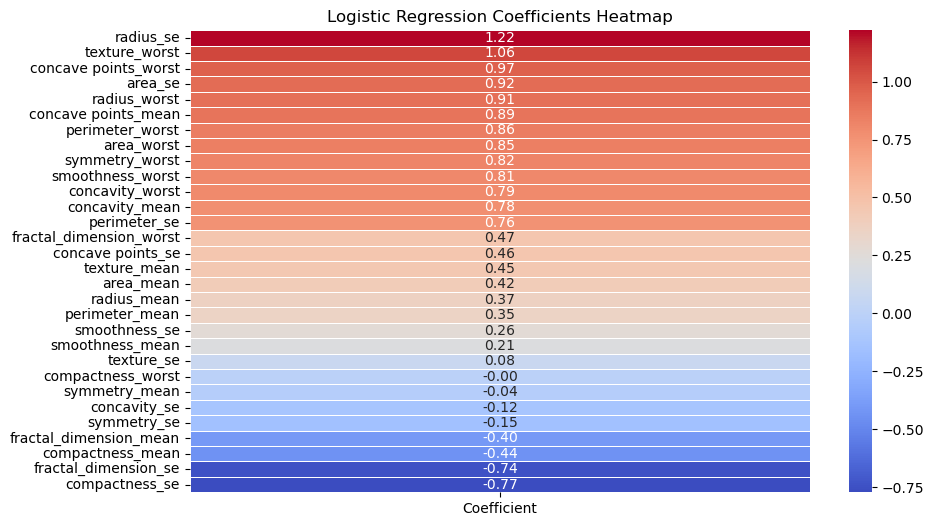

In [12]:
# Heatmap 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(coefficients, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Logistic Regression Coefficients Heatmap")
plt.show()

In [13]:
#예측 및 평가
predictions = logistic_model.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

print(f"로지스틱 회귀 모델의 정확도: {accuracy:.4f}")

로지스틱 회귀 모델의 정확도: 0.9737


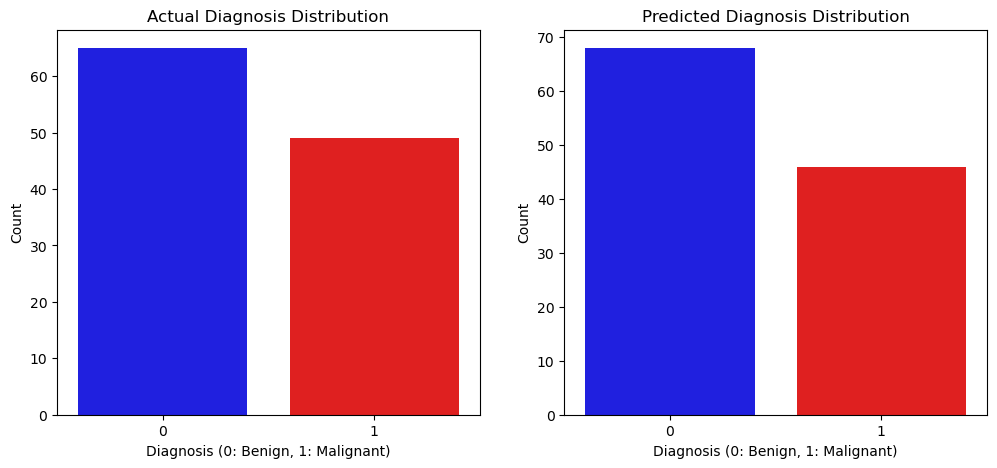

In [14]:
# 두 개의 그래프를 나란히 출력하기 위한 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 실제 데이터 시각화
sns.countplot(x=test_y, palette=['blue', 'red'], ax=axes[0])
axes[0].set_title("Actual Diagnosis Distribution")
axes[0].set_xlabel("Diagnosis (0: Benign, 1: Malignant)")
axes[0].set_ylabel("Count")

# 예측 데이터 시각화
sns.countplot(x=predictions, palette=['blue', 'red'], ax=axes[1])
axes[1].set_title("Predicted Diagnosis Distribution")
axes[1].set_xlabel("Diagnosis (0: Benign, 1: Malignant)")
axes[1].set_ylabel("Count")

# 그래프 출력
plt.show()